In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
na_values_df = pd.read_csv("../data/final_dataset.csv")
na_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  int64  
 6   imd_band              32545 non-null  float64
 7   age_band              32545 non-null  int64  
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32545 non-null  float64
 12  date_unregistration   32545 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  is_dropout         

In [3]:
X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
# y = y.astype(int)
X.shape,  y.shape

((32545, 16), (32545,))

In [4]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10,15]),# feature의 index로 지정.   # index는 앞에 했던 배열로 적용해줘야함.
    ("number_scaler", StandardScaler(), [9,11,12,13,14])    #feature Scaling은 연속형끼리 같은 방식을 사용 (standard or MinMax 중 택1)
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 488169 stored elements and shape (32545, 60)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 55)	3.905125197007625
  (0, 56)	-1.8185928989610989
  (0, 57)	0.6671221427396934
  (0, 58)	-0.1670317117402033
  (0, 59)	0.7100890620793591
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  (1, 53)	1.0
  :	:
  (32543, 40)	1.0
  (32543, 42)	1.0
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 54)	1.0
  (32543, 55)	-1.211159957215567
  (32543, 56)	0.4144516877944941
  (32543, 57)	-1.487791864498921
  (32543, 58)	-0.5562260670917427
  (32543, 59)	1.0137563256706723
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0
  (32544, 51)	1.0
  (32544, 53)	1.0
  (32544, 55)

In [5]:
X = new_merged_df
X = X.astype('float32')
X = X.toarray()
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape

((32545, 60), (32545,))

In [9]:
%pip install catboost lightgbm xgboost

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   - -------------------------------------- 3.1/102.4 MB 77.1 MB/s eta 0:00:02
   -- ------------------------------------- 6.3/102.4 MB 23.1 MB/s eta 0:00:05
   ----- ---------------------------------- 13.9/102.4 MB 22.0 MB/s eta 0:00:05
   ------- -------------------------------- 19.9/102.4 MB 28.4 MB/s eta 0:00:03
   ------- -------------------------------- 19.9/102.4 MB 28.4 MB/s eta 0:00:03
   --------- ------------------------------ 25.2/102.4 MB 20.0 MB/s eta 0:00:04
   -------------- ------------------------- 37.5/102.4 MB 25.1 MB/s eta 0:00:03
   ------------------- -------------------- 50.9/102.4 MB 30.0 MB/s eta 0:00:02
   ----------------------- ---------------- 59.0/102.4 MB 31.0 MB/s eta 0:00:02
   --------------------------- ------------ 70.8/102.4 MB 33.4 MB/s eta 0:00:01
   ------------------------------ --------- 78.9/102.4 MB 34.0 MB/


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
- Complete:4.26859초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.52116초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:4.86878초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:35.84228초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.38385초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:28.82304초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.74324초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:8.27661초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:7.91155초

 >>> Tuning Naive Bayes...
Fitting 5 

c:\Users\Playdata\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                                    Best Params  Train Accuracy (CV)  Test Accuracy
           CatBoost                                          {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}             0.899178       0.899370
            XGBoost                                  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899485       0.898448
           LightGBM                                  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}             0.898525       0.896451
      Random Forest                                  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}             0.884660       0.887079
Logistic Regression                                   {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}             0.881702       0.886926
                SVM 

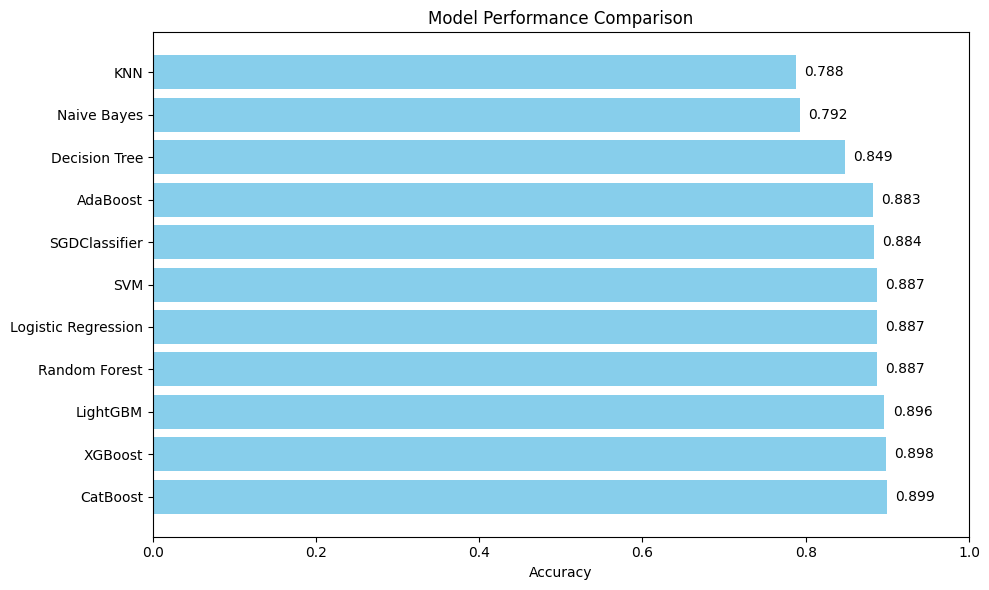


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3056
           1       0.92      0.79      0.85      3453

    accuracy                           0.85      6509
   macro avg       0.85      0.85      0.85      6509
weighted avg       0.86      0.85      0.85      6509



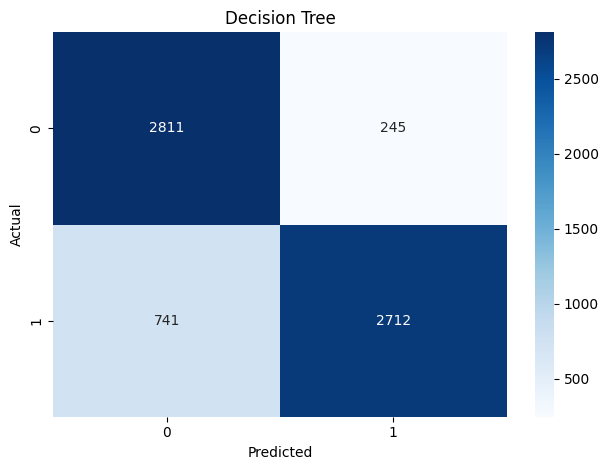


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3056
           1       0.95      0.83      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.90      0.89      0.89      6509



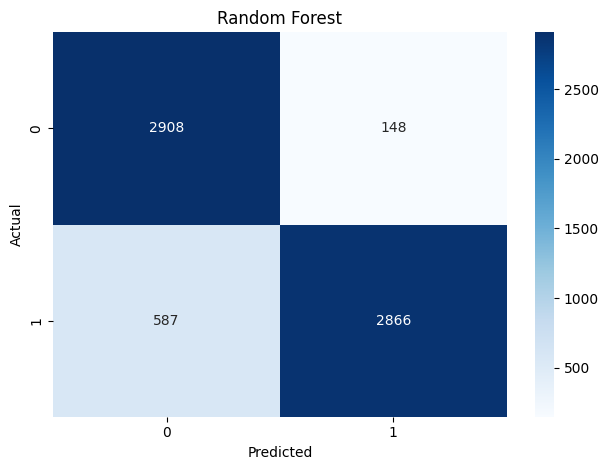


 KNN Best Model Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      3056
           1       0.85      0.73      0.79      3453

    accuracy                           0.79      6509
   macro avg       0.79      0.79      0.79      6509
weighted avg       0.80      0.79      0.79      6509



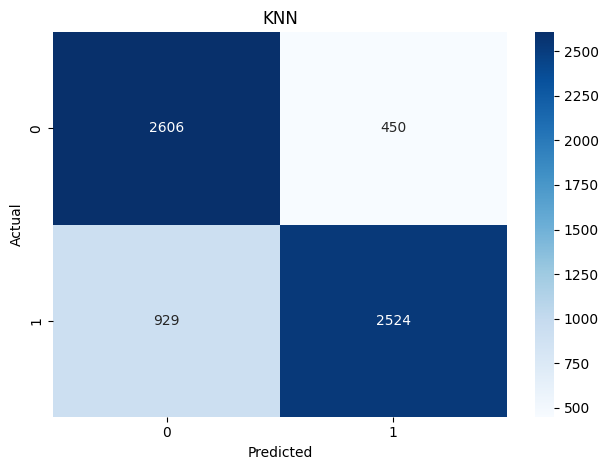


 SVM Best Model Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      3056
           1       0.93      0.85      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



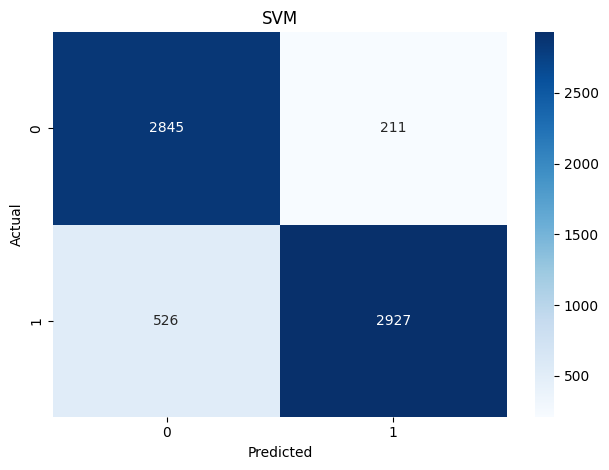


 XGBoost Best Model Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3056
           1       0.94      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



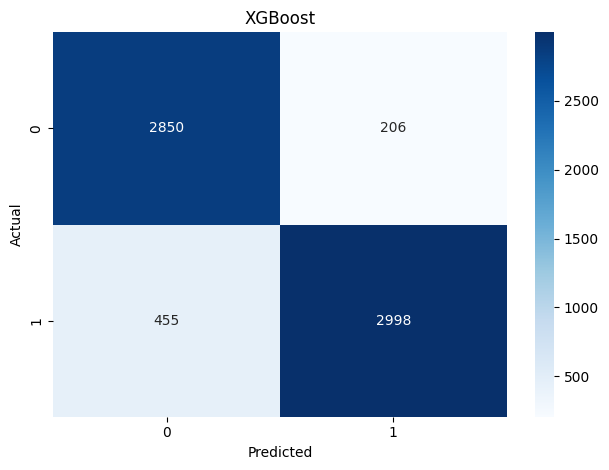


 Logistic Regression Best Model Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3056
           1       0.93      0.85      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



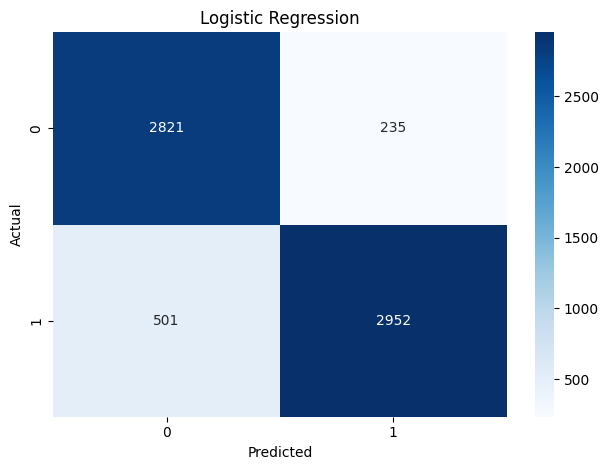


 SGDClassifier Best Model Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3056
           1       0.95      0.82      0.88      3453

    accuracy                           0.88      6509
   macro avg       0.89      0.89      0.88      6509
weighted avg       0.89      0.88      0.88      6509



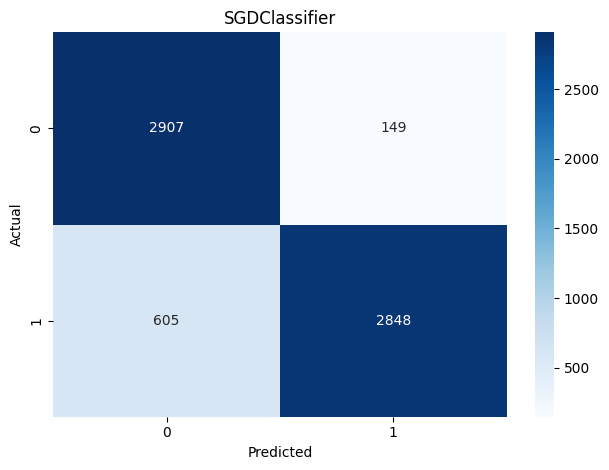


 AdaBoost Best Model Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3056
           1       0.92      0.85      0.88      3453

    accuracy                           0.88      6509
   macro avg       0.88      0.88      0.88      6509
weighted avg       0.89      0.88      0.88      6509



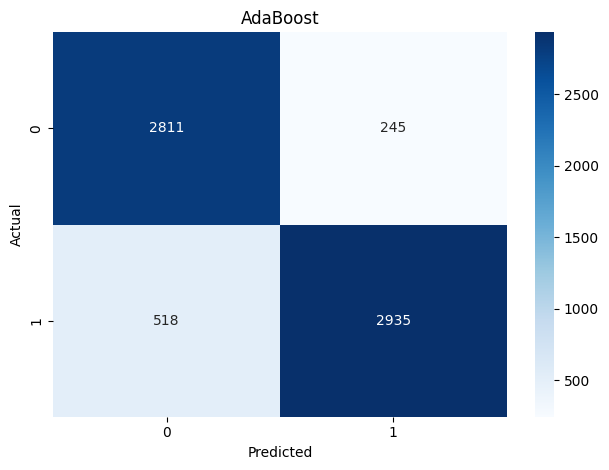


 CatBoost Best Model Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3056
           1       0.94      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



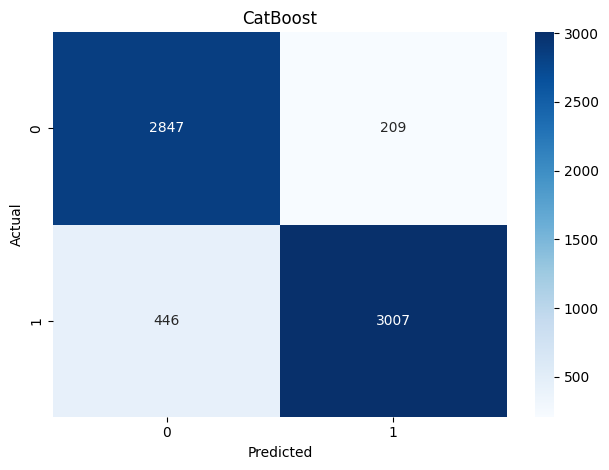


 Naive Bayes Best Model Report
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      3056
           1       0.99      0.62      0.76      3453

    accuracy                           0.79      6509
   macro avg       0.84      0.80      0.79      6509
weighted avg       0.85      0.79      0.79      6509



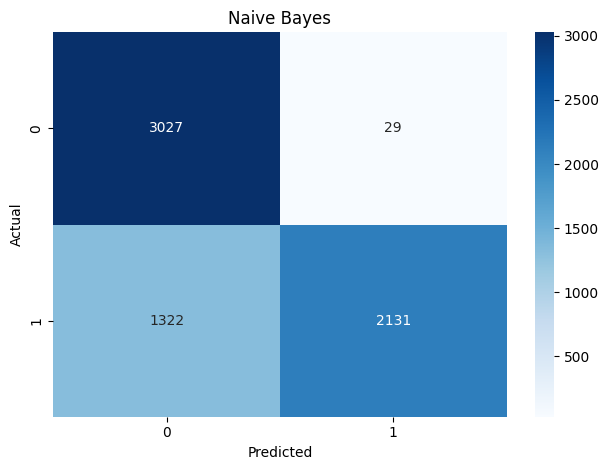


 LightGBM Best Model Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3056
           1       0.93      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



c:\Users\Playdata\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


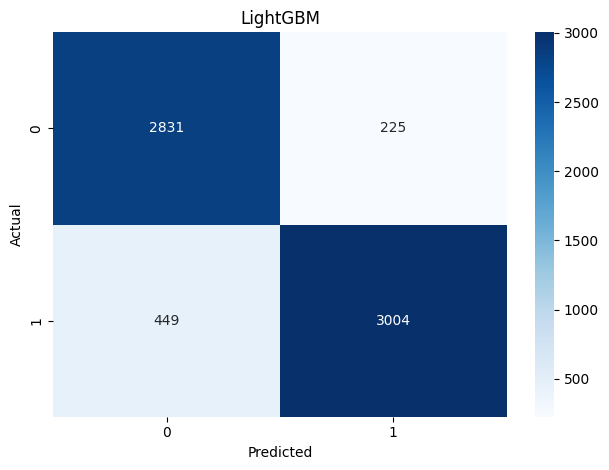

In [8]:
base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', SVC(random_state=42))
    ]),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', LogisticRegression(max_iter=5000, random_state=42))
    ]),
    "SGDClassifier": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', SGDClassifier(random_state=42))
    ]),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', GaussianNB())
    ]),
    "LightGBM": LGBMClassifier(random_state=42)
    # "MLPClassifier": Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('clf', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
    # ])
}

param_grids = {
    "Decision Tree": {
        "max_depth":range(1, 5),
        "max_leaf_nodes": [3, 5, 10],
        "min_samples_leaf": [2, 5, 10],
        "max_features": [1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50, 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'clf__n_neighbors':[3,5],
        'clf__weights': ['uniform', 'distance']},
    "SVM": {
        'clf__C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'clf__gamma': [0.1], #[0.01, 0.1, 1, 10],
        'clf__kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'clf__C': [ 0.1],  # 규제 강도
        'clf__penalty': [ 'l2'],  # 규제 유형
        'clf__solver': ['saga']},
    "SGDClassifier": {
        'clf__loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'clf__alpha': [ 0.01],  # 규제 계수
        'clf__learning_rate': ['adaptive'],
        'clf__eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "CatBoost": {
        'iterations': [100],
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1]
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }
    # "MLPClassifier": {
    #     'clf__hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'clf__activation': ['relu', 'tanh'],
    #     'clf__alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'clf__learning_rate_init': [0.001, 0.01],
    #     'clf__batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)

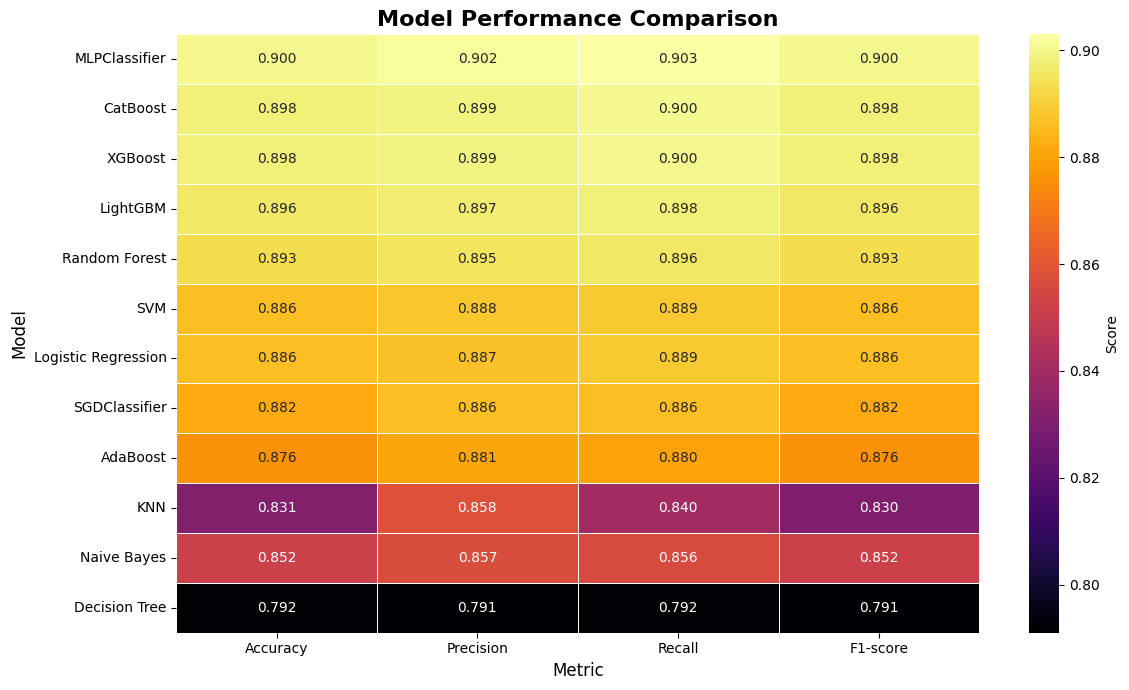

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 모델 성능 데이터
data = {
    'Model': [
        'MLPClassifier', 'CatBoost', 'XGBoost', 'LightGBM', 'Random Forest',
        'SVM', 'Logistic Regression', 'SGDClassifier', 'AdaBoost',
        'KNN', 'Naive Bayes', 'Decision Tree'
    ],
    'Accuracy': [0.900, 0.898, 0.898, 0.896, 0.893, 0.886, 0.886, 0.882, 0.876, 0.831, 0.852, 0.792],
    'Precision': [0.902, 0.899, 0.899, 0.897, 0.895, 0.888, 0.887, 0.886, 0.881, 0.858, 0.857, 0.791],
    'Recall': [0.903, 0.900, 0.900, 0.898, 0.896, 0.889, 0.889, 0.886, 0.880, 0.840, 0.856, 0.792],
    'F1-score': [0.900, 0.898, 0.898, 0.896, 0.893, 0.886, 0.886, 0.882, 0.876, 0.830, 0.852, 0.791]
}

df= pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Heatmap 시각화
plt.figure(figsize=(12, 7))
sns.heatmap(
    df,
    annot=True,
    fmt=".3f",
    cmap="inferno",  # 🔁 밝은색 = 낮은 성능, 어두운색 = 높은 성능
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
